In [1]:
import os
# suppress tf warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from model import EffNet

In [2]:
image_size = (512, 512)
val_data = '../datasets/images/valid'

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        val_data,
        image_size=image_size,
    )
class_names = val_dataset.class_names
num_classes = len(class_names)

model = EffNet(num_classes=num_classes)
model.build((1, *image_size, 3))

if os.path.exists('../models/effnetv2s.h5'):
    model.load_weights('../models/effnetv2s.h5')
else:
    raise Exception('Model weights not found')

model.summary()

Found 17572 files belonging to 38 classes.
Model: "eff_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, None, None, 1280   20331360  
 al)                         )                                   
                                                                 
 global_average_pooling2d (  multiple                  0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               multiple                  655872    
                                                                 
 dense_1 (Dense)             multiple                  65664     
                                                                 
 dense_2 (Dense)             multiple                  4902      
                                                                 
Total params: 21

9/9 [==============================] - 5s 237ms/step


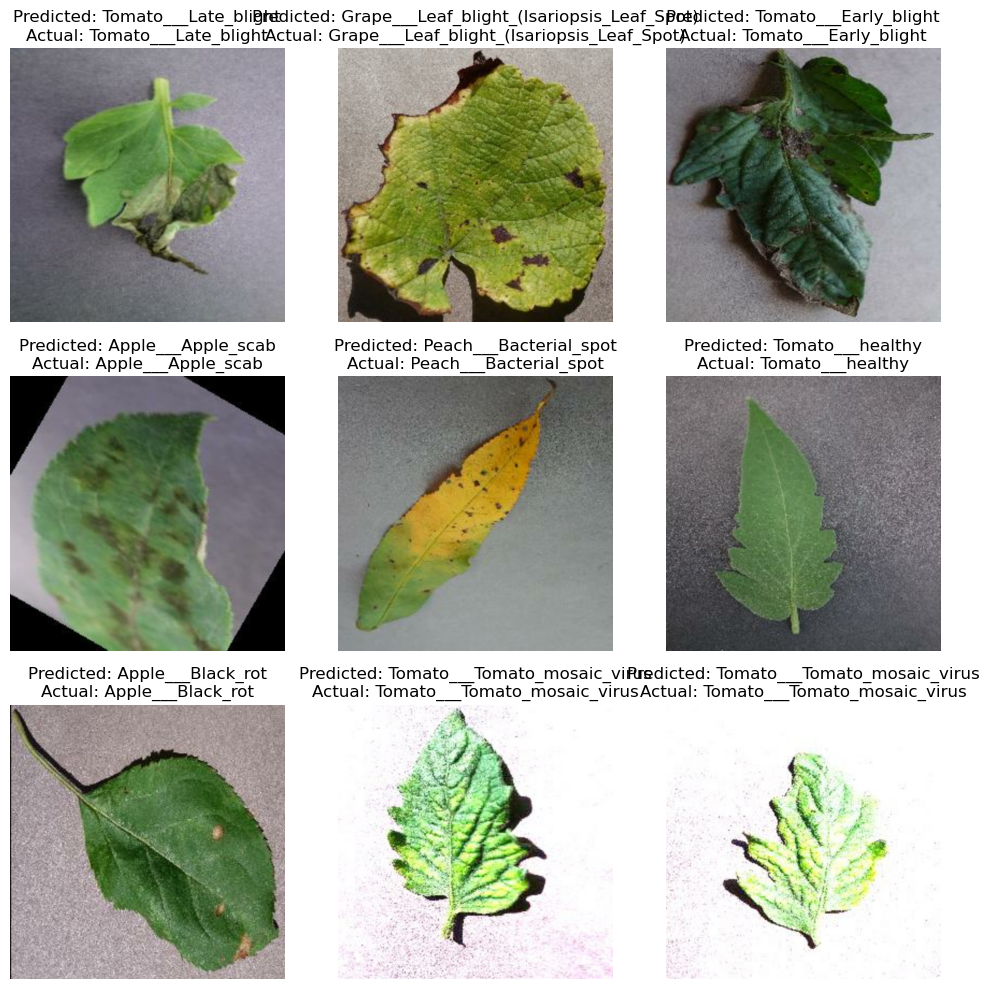

In [3]:
n = 9
X, y = [], []
for image, label in val_dataset.take(n):
    X.extend(image)
    y.extend(label.numpy())
    
y_pred = model.predict(np.array(X))
y_pred = np.argmax(y_pred, axis=1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i in range(n):
    ax = axes[i // 3, i % 3]
    ax.imshow(X[i] / 255., cmap='gray')
    ax.set_title(f"Predicted: {class_names[y_pred[i]]}\nActual: {class_names[y[i]]}")
    ax.axis('off')
plt.tight_layout()